print ('We have the data of the city bike trip of February 2014')
print ('')
print (' HYPOTHESIS ')
print (' The average number of bike-trips of a working day in February')
print (' is higher than the average numbers of bike trips in the weekend')
print ('')
print (' Lets define')
print (' WORKING DAY = MONDAY-FRIDAY ')
print (' WEEK-END = SATURDAY AND SUNDAY')
print (' BIKE TRIP = A pick up of a bike')
print (' AVERAGE NUMBER OF BIKE-TRIPS = Total number of bike-trips of "n" days divided by "n"')
print ('')
print ('')
print (' NULL HYPOTHESIS')
print (' The average number of bike-trips of a working day in February')
print (' is equal or less than the average numbers of bike trips in the weekend ')

print ('')
print ('Significance level a=0.05')

In [47]:

from __future__ import division, print_function
import sys
import os
import json
import sys
import csv
import pandas as pd
import numpy as np
import pylab as py
from pandas import Series, DataFrame
%pylab inline
#import seaborn
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [15]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
print (os.getenv ('PUI2016')) 


/home/cusp/cjs676/PUI2016


In [16]:
print (os.getenv ('PUI2016')+'/fbb_matplotlibrc.json')

/home/cusp/cjs676/PUI2016/fbb_matplotlibrc.json


In [17]:
#s = json.load("/home/cusp/cjs676/PUI2016_cjs676/cjs_matplotlibrc.json")
pl.rcParams.update()
os.getenv('PUIDATA')


'/home/cusp/cjs676/PUIdata'

In [97]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system


def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        
print('did anything work')

did anything work


In [104]:
datestring = '201402'
getCitiBikeCSV(datestring)


file in place, you can continue


In [105]:

dataframe = pd.read_csv('/home/cusp/cjs676/PUIdata/201402-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
dataframe['date'] = pd.to_datetime(dataframe['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 

dataframe.head(n=5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1,2014-02-01 00:00:00
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2,2014-02-01 00:00:03
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2,2014-02-01 00:00:09
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1,2014-02-01 00:00:32
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1,2014-02-01 00:00:41


In [106]:
dataframe.columns


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [107]:
dataframe.drop([ 'tripduration', 'starttime', 'stoptime',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender'], axis=1, inplace=True)

In [108]:
dataframe.head(n=5)


,start station id,date
0,294,2014-02-01 00:00:00
1,285,2014-02-01 00:00:03
2,247,2014-02-01 00:00:09
3,357,2014-02-01 00:00:32
4,401,2014-02-01 00:00:41


In [109]:
dataframe ['weekday'] = dataframe ['date'].apply(lambda x: x.weekday())


In [111]:
dataframe.head(n=5)


,start station id,date,weekday
0,294,2014-02-01 00:00:00,5
1,285,2014-02-01 00:00:03,5
2,247,2014-02-01 00:00:09,5
3,357,2014-02-01 00:00:32,5
4,401,2014-02-01 00:00:41,5


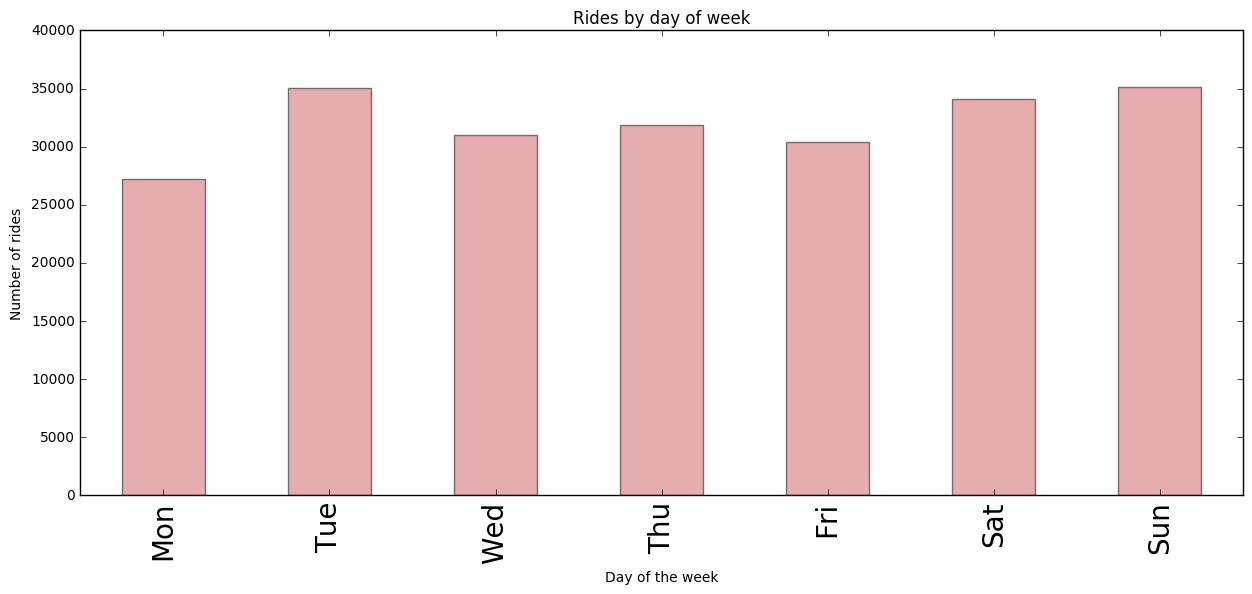

In [112]:
norm_w = 1 
ax = ((dataframe['date'].groupby([dataframe['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', alpha=0.5)

tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
ax.set_title ("Rides by day of week")

In [114]:
data_count = dataframe.groupby('weekday').size()

working_day_trip = 0
weekend_day_trip = 0

for i in range(0 , 4):
    working_day_trip = data_count[i] + working_day_trip

for i in (5,6):
    weekend_day_trip = data_count[i] + weekend_day_trip
    
print (weekend_day_trip)
print (working_day_trip)


69201
125164


In [132]:
#divide number of trips by the number of weekend days in the month
average_weekend_day_trip = weekend_day_trip / 8
#divide the number of trips by the number of weekdays in the month
average_working_day_trip = working_day_trip / 20
print (average_weekend_day_trip)
print (average_working_day_trip)
new_plot = [average_weekend_day_trip, average_working_day_trip]


8650.125
6258.2
